In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import heapq  
import datetime as dt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('fevereiro.csv')
df.head(5)

,JOGADOR,6/2/2021,13/2/2021,20/2/2021,27/2/2021
0,REINALDINHO,7.0,6.5,6.0,6.0
1,BOREBI,3.5,4.0,6.0,2.1
2,MURILO,4.0,0.0,8.5,4.0
3,MINEIRO,7.5,5.0,0.0,7.0
4,MARLON,8.5,8.0,7.0,7.0


In [3]:
df['Freq'] = df.iloc[:,1:5].apply(lambda x: x!=0, axis=1).sum(axis=1)

In [12]:
# Aqui temos a média por nota e a media por frequencia.
#df['Media'] = df.iloc[:,1:5].sum(axis=1) / df['Freq']

df['Media'] = df.iloc[:,1:5].mean(axis=1)

In [13]:
df

,JOGADOR,6/2/2021,13/2/2021,20/2/2021,27/2/2021,Freq,Media
0,REINALDINHO,7.0,6.50,6.0,6.00,4,6.3750
1,BOREBI,3.5,4.00,6.0,2.10,4,3.9000
2,MURILO,4.0,0.00,8.5,4.00,3,4.1250
3,MINEIRO,7.5,5.00,0.0,7.00,3,4.8750
4,MARLON,8.5,8.00,7.0,7.00,4,7.6250
5,ZORRO,3.4,0.00,0.0,5.00,2,2.1000
6,ANDRÉ,7.0,6.65,7.9,6.00,4,6.8875
7,MARQUINHO,5.0,0.00,0.0,0.00,1,1.2500
8,ALEX,6.0,0.00,4.0,2.20,3,3.0500
9,CAMARAO,3.5,6.00,5.0,3.00,4,4.3750


In [19]:
maior = pd.DataFrame(df,columns = ['JOGADOR',df.columns[6]])
maior[maior[df.columns[6]] >= 7]

,JOGADOR,Media
4,MARLON,7.625
11,TIKA,7.200
19,VETINHO,7.180


In [12]:
pior = pd.DataFrame(df,columns = ['JOGADOR',df.columns[3]])
#pior[pior[df.columns[2]] <= 3.5][:]
pior[pior.iloc[:, 1] == 4] 

,JOGADOR,20/2/2021
8,ALEX,4.0
16,KLEBER,4.0


In [32]:
df.head(34)

,JOGADOR,6/2/2021,13/2/2021,20/2/2021,27/2/2021,Freq,Media
0,REINALDINHO,7.0,6.50,0.0,0.0,2,6.750
1,BOREBI,3.5,4.00,0.0,0.0,2,3.750
2,MURILO,4.0,0.00,0.0,0.0,1,2.000
3,MINEIRO,7.5,5.00,0.0,0.0,2,6.250
4,MARLON,8.5,8.00,0.0,0.0,2,8.250
5,ZORRO,3.4,0.00,0.0,0.0,1,1.700
6,ANDRÉ,7.0,6.65,0.0,0.0,2,6.825
7,MARQUINHO,5.0,0.00,0.0,0.0,1,2.500
8,ALEX,6.0,0.00,0.0,0.0,1,3.000
9,CAMARAO,3.5,6.00,0.0,0.0,2,4.750


In [72]:
np.median([8.69,8,8.5,6.3])

8.25

In [73]:
np.sum([0,0,0,9.9])/1

9.9

In [63]:
np.sum([8.69,8,8.5,6.3])/4

7.8725

In [84]:
df.loc[:,'Media'] = df.iloc[:,1:5].mean(axis=1)

ValueError: could not convert string to float: 'Freq'

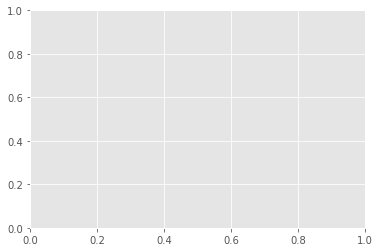

In [85]:
plt.plot(df['Media'])

In [46]:
df.iloc[:,1:5].apply(lambda x: x==0, axis=1).sum(axis=1)

0     3
1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    3
19    3
dtype: int64

In [7]:
heapq.nlargest(3,s)

NameError: name 's' is not defined

In [8]:
lst = [x for x in df.iloc[:,1:5]]
lst (a['x']==1) & (a['y']==10)

['6/2/2021', '13/2/2021', '20/2/2021', '27/2/2021']

In [148]:
sab1 = pd.DataFrame(df,columns = ['JOGADOR',df.columns[1]])
sab1[sab1[df.columns[1]] == 6.98]

,JOGADOR,2/1/2021
3,CADU,6.98


In [140]:
sab2 = pd.DataFrame(df,columns = ['JOGADOR',df.columns[2]])
sab2[sab2[df.columns[2]] <= 5][:1]

,JOGADOR,9/1/2021
2,BOREBI,3.75


In [142]:
sab3 = pd.DataFrame(df,columns = ['JOGADOR',df.columns[3]])
sab3[sab3[df.columns[3]] <= 3][:1]

,JOGADOR,16/1/2021
2,BOREBI,2.72


In [147]:
sab4 = pd.DataFrame(df,columns = ['JOGADOR',df.columns[4]])
sab4[sab4[df.columns[4]]== 3]

,JOGADOR,30/1/2021
25,ROBINHO,3.0


In [13]:
df.sort_values(by=df.columns[3], ascending=False).max()

JOGADOR      ZORRO
6/2/2021       8.5
13/2/2021        0
20/2/2021        0
27/2/2021        0
Media        2.125
dtype: object

In [14]:
sab1 = pd.DataFrame(df,columns = ['JOGADOR',df.columns[3]])
sab1.sort_values(by=['JOGADOR'], ascending=True).max()

JOGADOR      ZORRO
20/2/2021        0
dtype: object

In [18]:
df[df['20/2/2021'] == 0]

,JOGADOR,6/2/2021,13/2/2021,20/2/2021,27/2/2021,Media
0,REINALDINHO,7.0,0.0,0.0,0.0,1.750
1,BOREBI,3.5,0.0,0.0,0.0,0.875
2,MURILO,4.0,0.0,0.0,0.0,1.000
3,MINEIRO,7.5,0.0,0.0,0.0,1.875
4,MARLON,8.5,0.0,0.0,0.0,2.125
5,ZORRO,3.4,0.0,0.0,0.0,0.850
6,ANDRÉ,7.0,0.0,0.0,0.0,1.750
7,MARQUINHO,5.0,0.0,0.0,0.0,1.250
8,ALEX,6.0,0.0,0.0,0.0,1.500
9,CAMARAO,3.5,0.0,0.0,0.0,0.875


In [115]:
df[df['Media'] > 5][:3]

,JOGADOR,2/1/2021,9/1/2021,16/1/2021,30/1/2021,Media
0,ANDRÉ,8.69,8.0,8.5,6.3,7.8725
23,REINALDINHO,7.22,6.5,5.0,5.7,6.1050
28,SALLES,6.33,0.0,8.0,7.0,5.3325


In [116]:
df[df['Media'] < 5][:5]

,JOGADOR,2/1/2021,9/1/2021,16/1/2021,30/1/2021,Media
1,BONA,0.00,5.50,8.00,0.0,3.3750
2,BOREBI,0.00,3.75,2.72,0.0,1.6175
3,CADU,6.98,0.00,0.00,0.0,1.7450
4,CAGADO,0.00,0.00,4.00,6.8,2.7000
5,CAMARÃO,0.00,0.00,0.00,6.4,1.6000


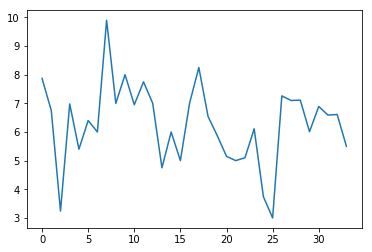

In [10]:
plt.plot(nota)